In [1]:
import pandas as pd
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from math import sin, cos, tan, pi

In [18]:
df = pd.read_csv('train.csv', names=["file_name", "center_x", "center_y", "alpha", "long_side", "short_side", "class"])

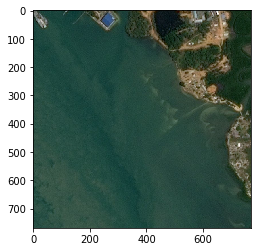

In [33]:
i = 10008
I = Image.open(df.file_name[i])
plt.imshow(I)
plt.show()

In [34]:
df.loc[i, :]

file_name     data\train\4201ebe23.jpg
center_x                            36
center_y                            30
alpha                          2.46685
long_side                      49.4065
short_side                     6.40312
class                             ship
Name: 10008, dtype: object

In [35]:
def box2Polygon(center_x, center_y, alpha, long_side, short_side):
    alpha_r = alpha
    lty = center_y - (cos(alpha_r)*(long_side/2)) - (cos(pi/2-alpha_r)*(short_side/2))
    ltx = center_x + (sin(alpha_r)*(long_side/2)) - (sin(pi/2-alpha_r)*(short_side/2))
    rty = center_y - cos(alpha_r)*(long_side/2) + cos(pi/2-alpha_r)*(short_side/2)
    rtx = center_x + sin(alpha_r)*(long_side/2) + sin(pi/2-alpha_r)*(short_side/2)
    lby = center_y + cos(alpha_r)*(long_side/2) - cos(pi/2-alpha_r)*(short_side/2)
    lbx = center_x - sin(alpha_r)*(long_side/2) - sin(pi/2-alpha_r)*(short_side/2)
    rby = center_y + cos(alpha_r)*(long_side/2) + cos(pi/2-alpha_r)*(short_side/2)
    rbx = center_x - sin(alpha_r)*(long_side/2) + sin(pi/2-alpha_r)*(short_side/2)
    return (ltx, lty), (rtx, rty), (rbx, rby), (lbx, lby)

In [36]:
a = box2Polygon(df.center_x[i], df.center_y[i], df.alpha[i], df.long_side[i], df.short_side[i])

In [37]:
# I = Image.fromarray(np.zeros((100, 100)))
# a = box2Polygon(50, 50, 45, 50, 50)

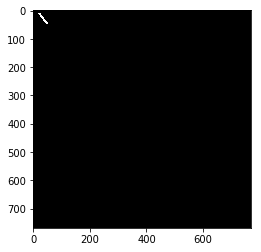

In [38]:
I = Image.fromarray(np.zeros((768, 768)))
ImageDraw.Draw(I).polygon(list(a), fill=255)
plt.imshow(I)
plt.show()

In [39]:
from getABSDData import getABSDDataFrames
from Utilities import annotation2Mask, mask2BoxParameters
train, dev, test = getABSDDataFrames(remove_nan=True)

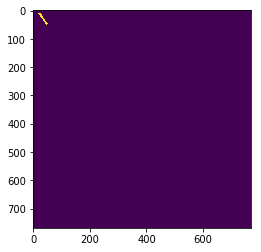

In [40]:
ann = train.iloc[i, 1]
mask = annotation2Mask(ann)
plt.imshow(mask)
plt.show()

In [41]:
(center_x, center_y, alpha, long_side, short_side) = mask2BoxParameters(mask)

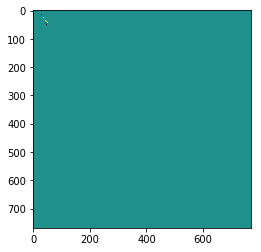

In [42]:
a = box2Polygon(center_x, center_y, alpha, long_side, short_side)
I = Image.fromarray(np.zeros((768, 768)))
ImageDraw.Draw(I).polygon(list(a), fill=1)
plt.imshow(I - mask)
plt.show()

In [15]:
center_x, center_y, alpha, long_side, short_side

(363.5, 392.0, 2.356194490192345, 16.278820596099706, 5.656854249492381)